In [11]:
#A generic ML regression task on predicting house price
%matplotlib inline
import pandas as pd
import os
import urllib
import tarfile
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# Fetching data
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    print("Fetching data . . . ")
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    print("Done")
#fetch_housing_data()

Fetching data . . . 
Done


In [4]:
path = './datasets/housing/housing.csv'        # DataSet path
data = pd.read_csv(path, engine='python')           # Pandas df
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Examining the dataset: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Categorical Field
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


Numberical features summary
Histogram: 


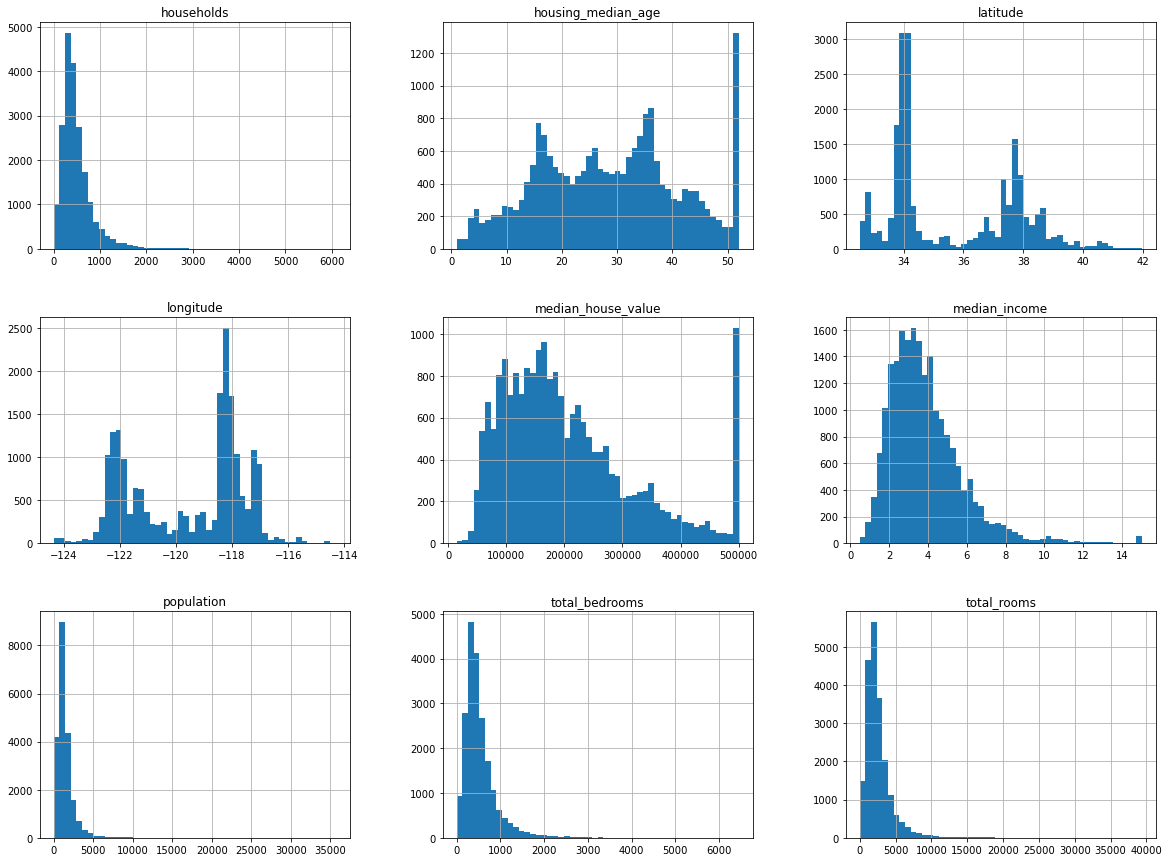

In [10]:
def data_examine(df):
    print("Examining the dataset: ")
    print("\n")
    # Information on data can be closely examined by info method
    # This method is usefull for detecting null values or inconsistencies
    df.info()
    print("\n")
    # value_counts returns the number of occurences of a categorical attribute
    print("Categorical Field")
    print(df["ocean_proximity"].value_counts())
    print("\n")

    print("Numberical features summary")
    df.describe()
    print("Histogram: ")
    df.hist(bins=50, figsize=(20, 15))
    plt.show()

data_examine(data)

In [20]:
# Splitting the training data
# The below function can also be done via sk-learn but I choose to write it from scratch
def train_test_split(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

X, y = train_test_split(data, 0.2)
print("Size of train data: ", len(X))
print("Size of test data: ", len(y))

Size of train data:  16512
Size of test data:  4128
